In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("ggplot")

In [2]:
# Read data
shp_path = (
    r"/home/jovyan/shared/pan_arctic_data/arcticDEM/radr_cats_merged_100m_slopes.shp"
)
slopes_gdf = gpd.read_file(shp_path)
dst_crs = "+proj=stere +lat_0=90 +lat_ts=90 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"

slopes_gdf.head()

,OutCOMID,area_km2,min,p25,median,p75,max,mean,std,count,geometry
0,25000001,202.960228,0.0,1.0,1.0,1.0,8.0,1.032233,0.633169,20600,"POLYGON ((1055929.523 -358773.793, 1056018.295..."
1,25000003,621.217126,0.0,1.0,1.0,1.0,18.0,1.392944,1.551191,63070,"POLYGON ((1065883.833 -403995.684, 1065796.134..."
2,25000008,135.043532,0.0,2.0,3.0,4.0,31.0,3.527087,2.980538,13715,"POLYGON ((1017349.812 -485405.364, 1017342.752..."
3,25000009,110.979199,0.0,1.0,2.0,3.0,29.0,2.908083,2.886441,11271,"POLYGON ((1055329.501 -424319.974, 1055385.035..."
4,25000010,115.206877,0.0,1.0,2.0,5.0,38.0,3.468739,3.439029,11708,"POLYGON ((1022663.516 -416309.221, 1022669.571..."


<AxesSubplot:>

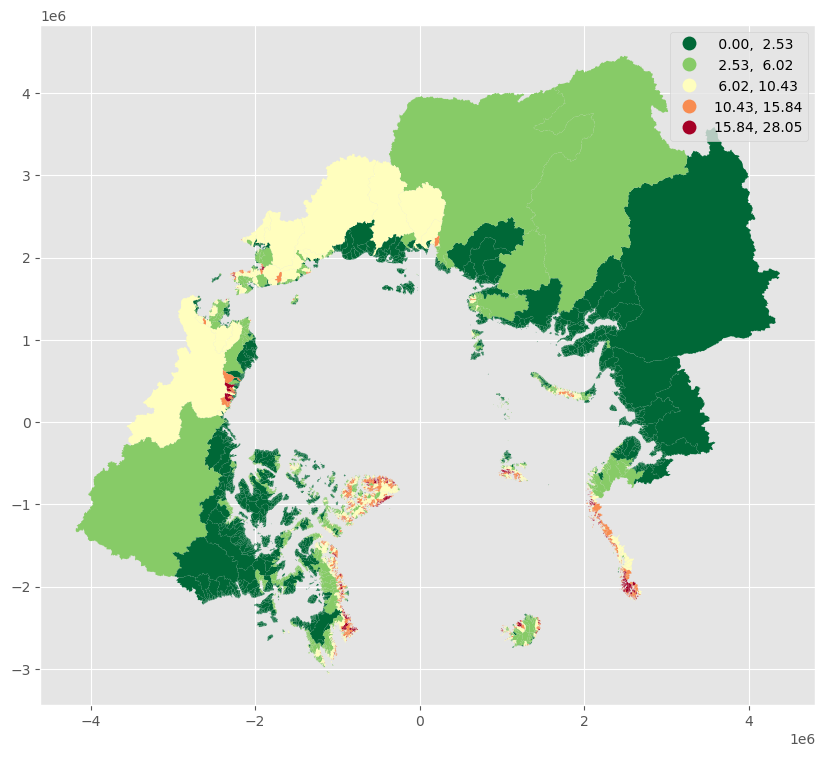

In [13]:
# Map of mean slopes
slopes_gdf.plot(
    column="mean",
    legend=True,
    scheme="natural_breaks",
    k=5,
    cmap="RdYlGn_r",
    figsize=(10, 10),
)

Text(0, 0.5, 'Mean slope [degrees]')

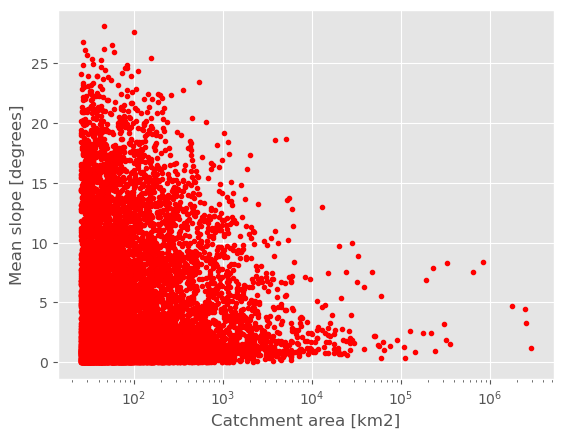

In [31]:
# Scatterplot of mean slope vs catchment area
plt.plot(slopes_gdf["area_km2"], slopes_gdf["mean"], "ro", ms=3)
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Catchment area [km2]")
plt.ylabel("Mean slope [degrees]")

In [4]:
# # Histogram of mean slope
# plt.hist(slopes_gdf["mean"], bins=80, log=False, density=True);

In [3]:
# Where is water quality measured in relation to catchment outflows?
sampling_locations_df = pd.read_csv(r'/home/jovyan/shared/pan_arctic_data/ArcticGRO_spatial_data/sampling_locations_water_quality.csv')
sampling_locations_gdf = gpd.GeoDataFrame(
    sampling_locations_df,
    geometry=gpd.points_from_xy(sampling_locations_df["Lon"], sampling_locations_df["Lat"], crs="epsg:4326"),
).to_crs(dst_crs)

<AxesSubplot:>

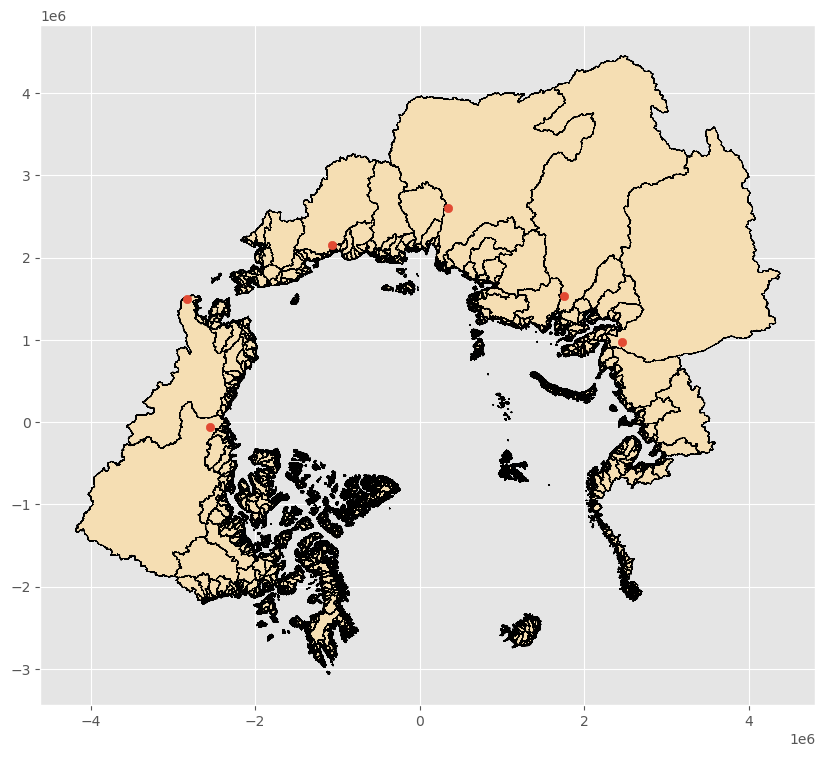

In [12]:
# Plot (this takes a little while)
ax = slopes_gdf.plot(figsize=(10, 10), edgecolor="k", facecolor="wheat")
sampling_locations_gdf.plot(ax=ax)

for x, y, label in zip(sampling_locations_gdf.geometry.x,
                       sampling_locations_gdf.geometry.y,
                       sampling_locations_gdf.River):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
ax.set_axis_off()

The Lena water quality sampling point is far enough away from the outflow that I **need to think about calculating slope for the subcatchment upstream of the water quality sampling point.** For now I'll just go with the full catchments from the outflow.

In [33]:
sampling_locations_gdf = sampling_locations_gdf.sjoin(slopes_gdf, predicate="within")
del sampling_locations_gdf["index_right"]
sampling_locations_gdf.set_index('River', inplace=True)
sampling_locations_gdf

,Sampling_loc,Lat,Lon,geometry,OutCOMID_left,area_km2_left,min_left,p25_left,median_left,p75_left,...,OutCOMID,area_km2,min,p25,median,p75,max,mean,std,count
River,,,,,,,,,,,,,,,,,,,,,
Ob,Salehard,66.63,66.60,POINT (2459842.294 973920.462),31006084,2.945383e+06,0.0,0.0,1.0,2.0,...,31006084,2.945383e+06,0.0,0.0,1.0,2.0,76.0,1.228580,2.393645,72999907
Yenisey,Dudinka,69.38,86.15,POINT (1752439.583 1531445.628),32000794,2.569614e+06,0.0,1.0,2.0,4.0,...,32000794,2.569614e+06,0.0,1.0,2.0,4.0,76.0,3.264864,3.348532,109627638
Lena,Zhigansk,66.77,127.37,POINT (349113.158 2606071.902),34000655,2.464300e+06,0.0,1.0,2.0,4.0,...,34000655,2.464300e+06,0.0,1.0,2.0,4.0,76.0,4.461433,6.839450,146095715
Kolyma,Cherskiy,68.75,161.30,POINT (-1063363.787 2151553.127),35006945,6.531339e+05,0.0,2.0,5.0,11.0,...,35006945,6.531339e+05,0.0,2.0,5.0,11.0,78.0,7.524730,7.637569,71416698
Yukon,Pilot Station,61.93,-162.88,POINT (-2825892.653 1494970.416),81020021,8.362082e+05,0.0,2.0,6.0,13.0,...,81020021,8.362082e+05,0.0,2.0,6.0,13.0,85.0,8.371787,8.353652,87478880
Mackenzie,Tsiigehtchic,67.45,-133.74,POINT (-2549792.308 -56081.902),82000867,1.791398e+06,0.0,0.0,1.0,5.0,...,82000867,1.791398e+06,0.0,0.0,1.0,5.0,81.0,4.671419,7.742697,105017803


In [5]:
# Read in AGRO chem data
in_chem_file = r'~/shared/pan_arctic_data/water_quality/ArcticGRO/ArcticGRO Water Quality Data_2022-02.xlsx'

xl = pd.ExcelFile(in_chem_file)
rivers_li = xl.sheet_names[:-1]

chem_var = 'DOC'

s_li = []
for river in rivers_li:
    df = pd.read_excel(in_chem_file, sheet_name=river, header=8, index_col=2,
                       skiprows=[9], parse_dates=True)
    doc_s = df[chem_var]
    doc_s.name = river
    s_li.append(doc_s)

doc_df = pd.concat(s_li, axis=1)
doc_df

,Ob,Yenisey,Lena,Kolyma,Yukon,Mackenzie
Date,,,,,,
2003-06-18,NaN,NaN,NaN,NaN,9.4,NaN
2003-06-24,NaN,NaN,NaN,NaN,NaN,5.5
2003-07-16,10.98,NaN,NaN,NaN,NaN,NaN
2003-07-25,NaN,NaN,NaN,NaN,NaN,NaN
2003-08-12,NaN,NaN,5.2,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-17,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-25,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-27,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

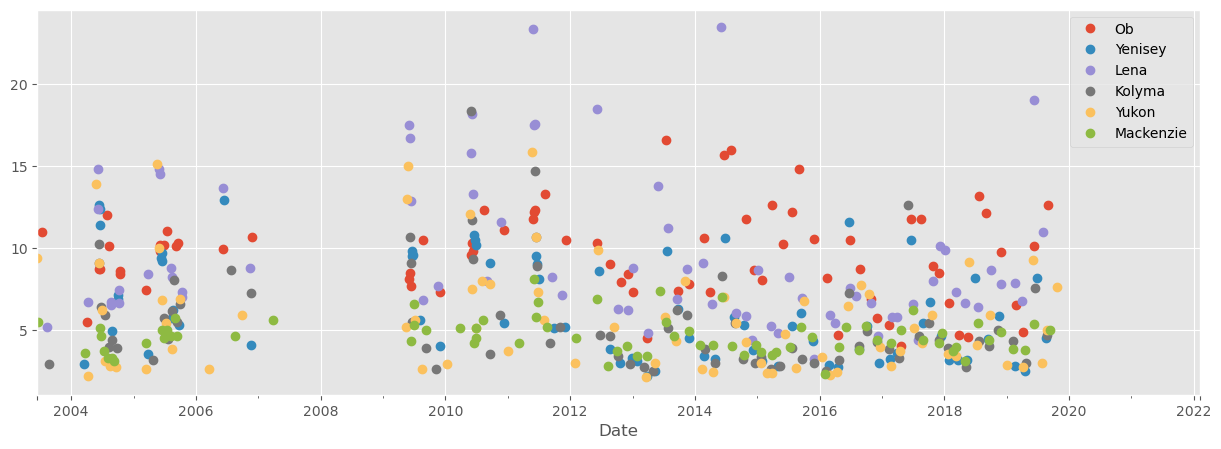

In [12]:
doc_df.plot(marker='o', linestyle='', figsize=(15, 5))

<AxesSubplot:>

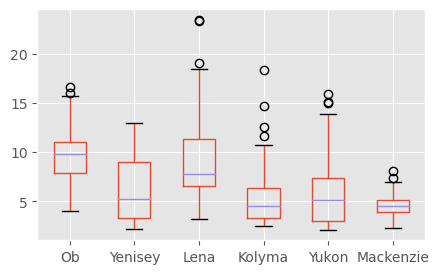

In [16]:
doc_df.boxplot(figsize=(5, 3))

<AxesSubplot:xlabel='Date'>

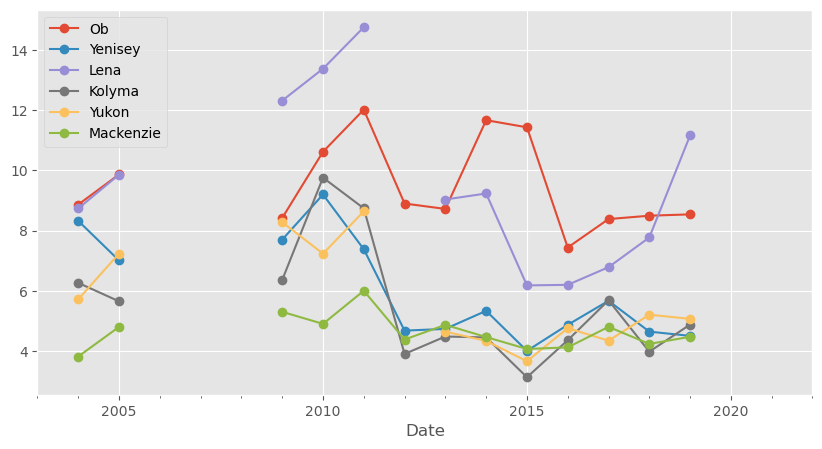

In [30]:
# resample getting a sum and non-null count
doc_annual_df = doc_df.resample('Y').agg(['mean']).droplevel(axis=1, level=1)
count_df = doc_df.resample('Y').agg(['count']).droplevel(axis=1, level=1)

# determine invalid months (not enough data points) and remove them
for river in rivers_li:
    invalid = count_df.loc[:, river] < 4
    doc_annual_df.loc[invalid, river] = np.NaN

# Drop values where all are NaN
# doc_annual_df.dropna(how='all', inplace=True)
doc_annual_df.plot(marker='o', figsize=(10, 5))

In [49]:
# Work out grand mean
# Can do this by averaging all values (more weight given to years with more obs), or averaging over years
# Decide to average over years to try to represent interannual variability
doc_mean_s = doc_annual_df.mean()
doc_mean_s.name = 'DOC'
doc_mean_s

Ob           9.490136
Yenisey      6.002436
Lena         9.618297
Kolyma       5.509120
Yukon        5.758800
Mackenzie    4.631644
Name: DOC, dtype: float64

In [51]:
doc_mean_df = pd.concat([doc_mean_s, sampling_locations_gdf['mean']], axis=1)
doc_mean_df.columns = ['DOC', 'mean_slope']
doc_mean_df

,DOC,mean_slope
Ob,9.490136,1.228580
Yenisey,6.002436,3.264864
Lena,9.618297,4.461433
Kolyma,5.509120,7.524730
Yukon,5.758800,8.371787
Mackenzie,4.631644,4.671419


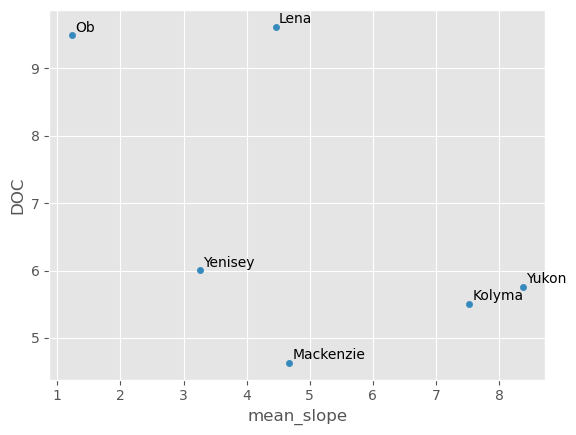

In [59]:
doc_mean_df.plot.scatter(x='mean_slope', y='DOC')
for idx, row in doc_mean_df.iterrows(): 
    plt.text(row['mean_slope']+0.05, row['DOC']+0.05, idx)

Connolly et al. (2018) binned concentration data for each sampling location into three seasons, and averaged all observations within a season:
* winter low flow: 1 October to 15 May
* spring high flow: 16 May to 30 June
* summer intermediate flow: 1 July to 30 September

However, this is gonna be too strict for the whole pan-Arctic (e.g. Målselva, melting starts before 16th May). Need to do based on simulated/observed discharge or something.

In some catchments east of the Sagavanirktok River, seasonal concentration values were from single sampling events. Where several days within a season and/or multiple years of data were collected at the same site, mean values were calculated for each season.

Don't take into account changes in CQ within a season, and don't take interannual variability into account.

To do:
* Split AGro data by same seasons as Connolly used. Useful anyway for better CQ regressions (and think about interpolating too, adding monthly mean values if have no data for a given month)
* Convert Connolly's slopes in % to degrees and see how they compare to James' estimates. Does DEM resolution make a big difference (1km for Connolly, 100 m for James)?
* What to do about catchment delineation and getting slopes for lots more places?? Ideally want the same 100m DEM James has already been working with.
* Before getting too bogged down in detail, think about how I'm going to actually use this spatial relationship to predict concentrations. Look at Connolly's section on calculating fluxes for some extra rivers.